In [6]:
%matplotlib inline

In [14]:
##### Step 1: import functions #####
import pickle
import pandas as pd
import numpy as np
from numpy.random import seed; seed(111)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.random import set_seed; set_seed(111)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import normalize
from six import StringIO  
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from IPython.display import Image  
import pydotplus
import time
from pathlib import Path
import math
from sklearn.preprocessing import StandardScaler

In [2]:
# %config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = [9,6]

In [3]:
phenotype = 'Glucose'

In [4]:
#load data
aging_dir = Path('/home/ubuntu/a/aging')

with open(aging_dir/'aging-cytof-data.obj', 'rb') as f:
    allData = pickle.load(f)
samples = allData["samples"]
cyto_data = allData['expr_list']
# Truncate cytodata
cyto_data = cyto_data[ :, :int(5e3)]
markers = allData["marker_names"]

print(f'Dimensions of cyto_data: {cyto_data.shape}')
print(f'Dimensions of samples: {samples.shape}')
print(f'Names of the makers: {markers.values}')

Dimensions of cyto_data: (260, 5000, 27, 1)
Dimensions of samples: (260, 85)
Names of the makers: ['CELL_LENGTH' 'DEAD' 'CD19' 'CD4' 'CD8' 'IGD' 'CD85J' 'CD16' 'CD3' 'CD38'
 'CD27' 'CD14' 'CD94' 'CCR7' 'CD45RA' 'CD20' 'CD127' 'CD33' 'CD28' 'CD24'
 'CD161' 'TCRGD' 'CD56' 'HLADR' 'CD25' 'DNA1' 'DNA2']


count    202.000000
mean      90.009901
std       20.171156
min       56.000000
25%       80.250000
50%       87.000000
75%       95.000000
max      291.000000
Name: Glucose, dtype: float64


<AxesSubplot:ylabel='Frequency'>

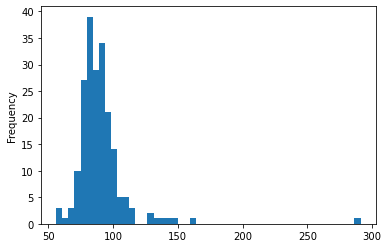

In [10]:
print(samples[phenotype].describe())
samples[phenotype].plot.hist(bins=50)

In [28]:
##### Step 3: split train, validation and test######
x = []
y = []
for i, row in samples.iterrows():
    if math.isnan(row[phenotype]):
        continue
    x.append(cyto_data[i])
    y.append(row[phenotype])
age_range = max(y) - min(y)
x = np.asarray(x)
y_raw = np.asarray(y)


x_train, x_valid, y_train, y_valid = train_test_split(x, y_raw)
y_train = y_train.reshape(-1,1)
y_valid = y_valid.reshape(-1,1)
scaler = StandardScaler()
scaler.fit(y_train)
y_train = scaler.transform(y_train).reshape(1,-1)[0]
y_valid = scaler.transform(y_valid).reshape(1,-1)[0]